<p class='cooltitle' style="font-size:35px; text-align:center;" >The Passive Membrane</p>

<br>
<br>
<br>
In this notebook, we're going to implement the elementary biophysical properties of the neuronal membrane using Python, starting with the equilibrium potential caracterised by the Nernst Equation, trying to understand the relationship between current and voltage, and finishing with the time- and space-dependant properties of this phospholipid bilayer. 
<br>

Passive membrane properties are really important because they will affect the way the neurons integrate information and transfer action potentials.

<h1>Table of contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Equilibrium-Potential" data-toc-modified-id="Equilibrium-Potential-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Equilibrium Potential</a></span></li><li><span><a href="#$I-V$-curves" data-toc-modified-id="$I-V$-curves-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>$I-V$ curves</a></span></li><li><span><a href="#Temporal-Properties" data-toc-modified-id="Temporal-Properties-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Temporal Properties</a></span></li><li><span><a href="#Spatial-Properties" data-toc-modified-id="Spatial-Properties-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Spatial Properties</a></span></li></ul></div>

Like always, Let's start by importing some libraries that will serve our purpose.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Equilibrium Potential

- Let's take a look at the famous Nernst Equation : $$\boxed{{{\text{E}}_{{ion}}} =   {\frac{{R T}}{z  \mathcal{F}}} \ln \left( \frac{c_{out}}{c_{in}} \right)}$$

> * The ideal gas constant $R = 8.314 \; \; \;   V.C.K^{-1}.mol^{-1}$
<br>
* The absolute temperature in Kelvin $T = 273.15 + T(C°)$
<br>
* Faraday's Constant $\mathcal{F} \approx 96500 \; \; C.mol^{-1}$ , it is the product of the elementary charge in Columb and Avogadro's constant.
<br>
* Ion valence $z$
<br>
* $\frac{C_{e}}{C_{i}}$ is the extracellular concentration of the given ion divided by its intracellular concentration, given that the extracellular space is considered as the electrical reference (we measure the intracellular voltage compared to it), we place it on the numerator in the Nernst equation.
<br>
* The equilibrium potential for a specific ion is expressed in Volts, it corresponds to the value of the membrane potential, where the global ion flow is zero, i.e the amount of ions that enter the cell is equal to the amount that gets out.

- Let's go ahead now and take a look at some of the values of ion concentrations (in mM) for specific types of cells at certain tempertaures :
<br>
<table style="width:90%;border: 1px solid black; border-collapse: collapse;">
    <tr>
        <th colspan="3" style="text-align:center; border-right:1px solid black; background-color: black;
  color: white">A frog's muscle at $T = 20°C$ </th>
        <th colspan="3" style="text-align:center; border-right:1px solid black;  background-color: black;
  color: white">Squid's giant axon at $T = 6.3°C$</th>
        <th colspan="3" style="text-align:center;  background-color: black;
  color: white ">A typical Mammal cell at $T = 37°C$</th>
    </tr>
    <tr>
        <td style="text-align:center;border-bottom: 1px solid black">$\bf{Ion}$</td>
        <td style="text-align:center;border-bottom: 1px solid black">$\bf{In}$</td>
        <td style="text-align:center; border-right:1px solid black;border-bottom: 1px solid black">$\bf{Out}$</td>
        <td style="text-align:center;border-bottom: 1px solid black">$\bf{Ion}$</td>
        <td style="text-align:center;border-bottom: 1px solid black">$\bf{In}$</td>
        <td style="text-align:center; border-right:1px solid black;border-bottom: 1px solid black">$\bf{Out}$</td>
        <td style="text-align:center;border-bottom: 1px solid black">$\bf{Ion}$</td>
        <td style="text-align:center;border-bottom: 1px solid black">$\bf{In}$</td>
        <td style="text-align:center;border-bottom: 1px solid black">$\bf{Out}$</td>                   
    </tr>
    <tr>    
        <td style="text-align:center;">$K^{+}$</td>
        <td style="text-align:center;">124 </td>
        <td style="text-align:center; border-right:1px solid black;">2.25 </td>   
        <td style="text-align:center;">$K^{+}$</td>
        <td style="text-align:center;">400 </td>
        <td style="text-align:center; border-right:1px solid black;">20 </td>   
        <td style="text-align:center;">$K^{+}$</td>
        <td style="text-align:center;">140 </td>
        <td style="text-align:center;">5</td>
    </tr>
    <tr>    
        <td style="text-align:center;">$Na^{+}$</td>
        <td style="text-align:center;">10.4 </td>
        <td style="text-align:center; border-right:1px solid black;">109 </td>   
        <td style="text-align:center;">$Na^{+}$</td>
        <td style="text-align:center;">50 </td>
        <td style="text-align:center; border-right:1px solid black;">440 </td>   
        <td style="text-align:center;">$Na^{+}$</td>
        <td style="text-align:center;">5 - 15 </td>
        <td style="text-align:center;">145</td>
    </tr>
    <tr>    
        <td style="text-align:center;">$Cl^{-}$</td>
        <td style="text-align:center;">1.5 </td>
        <td style="text-align:center; border-right:1px solid black;">77.5 </td>   
        <td style="text-align:center;">$Cl^{-}$</td>
        <td style="text-align:center;">40 - 150 </td>
        <td style="text-align:center; border-right:1px solid black;">560 </td>   
        <td style="text-align:center;">$Cl^{-}$</td>
        <td style="text-align:center;">4 </td>
        <td style="text-align:center;">110</td>
    </tr>    
    <tr>    
        <td style="text-align:center;">$Ca^{2+}$</td>
        <td style="text-align:center;">$10^{-4}$</td>
        <td style="text-align:center; border-right:1px solid black;">2.1 </td>   
        <td style="text-align:center;">$Ca^{2+}$</td>
        <td style="text-align:center;">$10^{-4}$</td>
        <td style="text-align:center; border-right:1px solid black;">10 </td>   
        <td style="text-align:center;">$Ca^{2+}$</td>
        <td style="text-align:center;">$10^{-4}$</td>
        <td style="text-align:center;">2.5 - 5</td>
    </tr>   
</table>


<br>

- The aim now is to calculate for each cell type and for each ion, its equilibrium potential using the Nernst Equation.
<br>
<br>
We can automate the process by : 
<br>
1 - choosing a proper Python data type to store the values of the valence of ions as well as its concentrations (intracellular and extracellular).
<br>
2 - Translating the Nernst Equation into a function and applying it to our values.
<br>
3 - Storing our values and seeing them.

> Given that every ion for every cell type has  different concentrations and at different temperatures, we're going to create for every ion, a dictionary containing its valence as the first element as a key/value pair, its extracellular concentration as its 2nd pair, its extracellular concentration as the 3rd pair and finally the temperature in C°.
<br>
<br>
**dict('z':valence, 'Ce':out_concentration, 'Ci':in_concentration, 'T':tempertaure)**
<br>
<br>
Next, we're going to store these dictionaries as nested dictionaires in one big dictionary (with the name of every ion as a key).

In [2]:
table = {
    'K_frog': {
        'z': +1,
        'co': 2.25e-3,
        'ci': 124e-3,
        'T': 20
    },
    'Na_frog': {
        'z': +1,
        'co': 109e-3,
        'ci': 10.4e-3,
        'T': 20
    },
    'cl_frog': {
        'z': -1,
        'co': 77.5e-3,
        'ci': 1.5e-3,
        'T': 20
    },
    'ca_frog': {
        'z': +2,
        'co': 2.1e-3,
        'ci': 1.0e-7,
        'T': 20
    },
    'K_squid': {
        'z': +1,
        'co': 20e-3,
        'ci': 400e-3,
        'T': 6.3
    },
    'Na_squid': {
        'z': +1,
        'co': 440e-3,
        'ci': 50e-3,
        'T': 6.3
    },
    'cl_squid': {
        'z': -1,
        'co': 560e-3,
        'ci': 40e-3,
        'T': 6.3
    },
    'ca_squid': {
        'z': +2,
        'co': 10e-3,
        'ci': 1.0e-7,
        'T': 6.3
    },
    'K_mammal': {
        'z': +1,
        'co': 5e-3,
        'ci': 140e-3,
        'T': 37
    },
    'Na_mammal': {
        'z': +1,
        'co': 145e-3,
        'ci': 5e-3,
        'T': 37
    },
    'cl_mammal': {
        'z': -1,
        'co': 110e-3,
        'ci': 4e-3,
        'T': 37
    },
    'ca_mammal': {
        'z': +2,
        'co': 2.5e-3,
        'ci': 1.0e-7,
        'T': 37
    }
}

> Let's initialise some constants

In [3]:
EC, AV, GAZ_CONST = 1.60217646e-19, 6.0221415e23, 8.314472  # Elementary charge, avogadro's and gaz constants

FC = EC * AV  # Faraday's constant is the elementary charge times Avogadro's constant.

abs_temp = lambda celsius : celsius + 273.15 # Returns temperature in Kelvin

> Now that the values have been stored, we're going to use a Python function to implement the Nernst equation.

In [4]:
def nernst(ion):
    """"This function returns the Nernst Equation
    ion : a dictionary of four keys ; ion valence, extracellular
    concentration, intracellulaur concentration and 
    tempertaure in Celsius; alongside their corresponding values
    """
    return (GAZ_CONST * abs_temp(ion['T'])) / (ion['z'] * FC) * np.log(
        ion['co'] / ion['ci'])

> Let's initialize another dictionary to store the results

In [5]:
results = {'Ion': [], 'Eeq': []}

> Now we're going to apply our Nernst Python Function to every dictionary stored in the 'table' dictionary, at the same time we're going to store its output; i.e the equilibrium potential, in the new 'results' dictionary. 
<br>
This can be done using the built-in for loop, passing through every key and value (ion and its information) in the table dictionary, storing the equilibrium potential in the results dictionary as well as its name.

In [6]:
for ion, info in table.items():
    results['Ion'].append(ion)
    results['Eeq'].append(nernst(info))  # The equilibrium potential is in Volts

> Now let's just see the results : 

In [8]:
ion_eq = pd.DataFrame(
    results
)  # Using the DataFrame inside Jupyter Notebook displays the results as a beautiful html table
ion_eq

,Ion,Eeq
0,K_frog,-0.101283
1,Na_frog,0.059354
2,cl_frog,-0.099653
3,ca_frog,0.125706
4,K_squid,-0.072141
5,Na_squid,0.052371
6,cl_squid,-0.063552
7,ca_squid,0.138622
8,K_mammal,-0.089059
9,Na_mammal,0.089997


<hr class='sep'>

# $I-V$ curves

- Every variation in the current of a membrane $I$ is accompanied by a variation in its electrical potential $V$, and vice versa.

- In electrophysiology, this relationship can be studied by the means of 2 models : **the linear model** or Ohm's law and **The Goldman-Hodgkin-Katz (GHK) model**.

- In the linear model, the current is taken from Ohm's law : 

$$I_{ion} = g_{ion}\left( V_m - E_{ion} \right)$$

> and the membrane's rest potential is : $V_{rest} = \sum_{i=1}^{n} \frac{G_iE_i}{G_i}$

- The current in GHK model is given by : 
$$\boxed{I_{ion} = Pz_{ion}F\xi \left( \frac{c_{out}e^{-\xi} -  c_{in}}{e^{-\xi} - 1}\right)}$$

> where $\xi = \frac{z_{ion}FV}{RT}$ and $P$ is the permeability of the membrane for the given ion.

-  At equilibrium in the GHK model, the total membrane current is zero and so the equilibrium membrane potential is given by : 

$$\boxed {V_{rest} = \frac{RT}{F} \ln \left( \frac{P_{K^+}[K^+]_{out} + P_{Na^+}[Na^+]_{out} + P_{Cl^-}[Cl^-]_{in}}{P_{K^+}[K^+]_{in} + P_{Na^+}[Na^+]_{in} + P_{Cl^-}[Cl^-]_{out}}\right)}$$

- Let's take a look at how we might implement the GHK model in Python : 

> let's take some values for our voltage from -100 to +100 mV

In [9]:
v = np.linspace(-100e-3, 100e-3, 100)

> As you may have noticed, we're missing the permeability values for our ions, let's consider that the the $K^+$ permeablity is $1.96 * 10^-5 \ (cm.s^-1)$ and that the permability quotient for our three major ions is $K^+:Na^+:Cl^-=1:0.03:0.1$

In [10]:
table['K_squid']['P'] = 1.96e-5
table['Na_squid']['P'] = 1.96e-5 * 0.03
table['cl_squid']['P'] = 1.96e-5 * 0.1

> It might be interesting to see the whereabouts of the value of the equilibrium potential for each ion on the curve, so let's just take the values for the squid that we already calculated and stored in ion_eq dataframe earlier(using the Nenrst equation).
<br>
We can do this simply by using a dictionray comprehension that will search the ion_eq dataframe for the ions of the squid and their values, they will be stored as key/value pairs in a new dictionary.

In [11]:
squid_eq = {
    ion + '_squid': float(ion_eq[(ion_eq['Ion'] == ion + '_squid')]['Eeq'])
    for ion in ['K', 'Na', 'cl']
}
print(squid_eq)

{'K_squid': -0.07214072206637946, 'Na_squid': 0.052370554234088686, 'cl_squid': -0.06355157402205179}


> What we're going to do now is that we're going to write the current and rest potential equations of the GHK model into python functions, and we're also going to write another function that lets us draw the IV-curve, this last function might seem useful for automating the plotting process if we're going to draw a few IV-curves for a few ions.


In [12]:
def I_ghk(ion, voltage):
    """This function returns the GHK model current for an array of voltages"""
    xi = (ion['z'] * FC * voltage) / (GAZ_CONST * (abs_temp(ion['T'])))
    return ion['P'] * ion['z'] * FC * xi * (
        (ion['co'] * np.exp(-xi) - ion['ci']) / (np.exp(-xi) - 1))


def vrest_ghk(ion_k, ion_na, ion_cl):
    """This function calculates the rest potential from the GHK model,
    only potassium, sodium and chlore into account as the others ions are often negligable.
    """
    return (GAZ_CONST * abs_temp(ion_k['T']) / FC) * np.log(
        (ion_k['P'] * ion_k['co'] + ion_na['P'] * ion_na['co'] +
         ion_cl['P'] * ion_cl['ci']) /
        (ion_k['P'] * ion_k['ci'] + ion_na['P'] * ion_na['ci'] +
         ion_cl['P'] * ion_cl['co']))


def iv_curve(ion, voltage, color, name):
    """This function plots an iv-curve for a given ion withing a given array 
    of voltages, and it shows a dot on the curve where the equilibrium potential is.
    color : type str, see matplotlib documentation for colors
    name : type str, the label for the legend
    """
    plt.plot(voltage, I_ghk(table[ion], voltage), color,
             label=name)  # Draw IV curve
    plt.plot(
        squid_eq[ion], I_ghk(table[ion], squid_eq[ion]), 'o' + color
    )  # squid_eq is the dictionary initalised earlier with nernst potentials

> Now that we've written the functions and initialised all the values needed, we're going to plot the results.

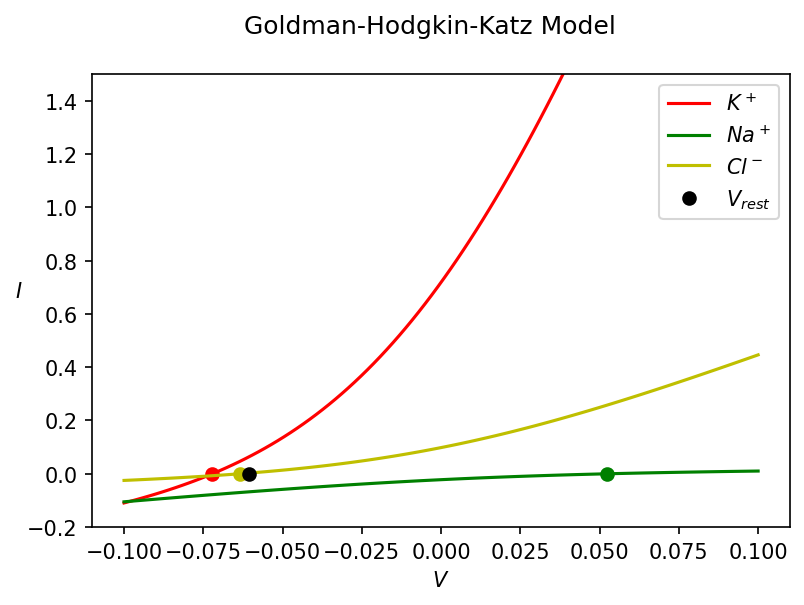

In [13]:
fig, ax = plt.subplots(dpi=150)  # Figure creation
iv_curve(ion='K_squid', voltage=v, color='r',
         name='$K^+$')  # Potassium curve is in red
iv_curve(ion='Na_squid', voltage=v, color='g',
         name='$Na^+$')  # Sodium curve is in green
iv_curve(ion='cl_squid', voltage=v, color='y',
         name='$Cl^-$')  # Chlore curve is in yellow
plt.plot(
    vrest_ghk(table['K_squid'], table['Na_squid'], table['cl_squid']),
    0,
    'ok',
    label="$V_{rest}$"
)  # Black dot for the membrane equilibrium potential, coordinates Vrest and 0
plt.xlabel('$V$')
plt.ylabel('$I$', rotation=0)
plt.ylim(-0.2, 1.5)
plt.suptitle('Goldman-Hodgkin-Katz Model')
plt.legend()

<hr class='sep'> 

Up until now we've seen how to calculate for each ion its equilibrium potential using the nernst equation, we've looked at how the current induced by a certain ion can change according to the electrical potential, we also calculated the equilibrium potential of the squid's giant axon at a certain tempertaure, now we're going to see how the membrane potential varies with time and with space.

# Temporal Properties


- When injecting current in a cell, the membrane will not respond immediately, a certain amount of time is needed in order to arrive to the maximum injected value.
- We call this amount of time **the time constant** $\tau$, this time constant varies from one cell to another : $\boxed{\tau = R_m C_m = r_mc_m}$

- The membrane potential at a certain time $t$ is given by the formula :
<br>
$$\boxed{V_m(t) = V_{rest} + r_mI_0(1 - e^{\frac{-t}{\tau}})}$$

> $r_m$ is the membrane resistance, it is the specific membrane resistance $R_m$ divided by the membrane surface $S$
<br>
$I_0$ is the injected current intensity
<br> $t$ is the time vector and $\tau$ is the time constant

- Let's take a look at how me might visualise the time course for the membrane potential : 

> A small anonymous function can help us calculate the time constant $\tau$ from  the membrane resistance and the membrane capacitance

In [14]:
tau = lambda Rm, Cm: Rm * Cm

> Now we can write the function that gives the voltage in a certain time : 

In [15]:
def potential_t(time, Rm, surface, Io, rest_potential=0, Cm=1):
    """This function returns the value of the membrane potential at a given time t,
    the time constant tau is The specific membrane resistance times the specific
    membrane capacitance which is 1 µF/cm^2. Rest potential is by default 0.
    time : type array, the time vector
    Rm : type int, membrane resistance
    surface : type int, membrane surface
    Io : type int, injected current
    """
    return rest_potential + (Rm * Io / surface) * (1 -
                                                   np.exp(-time / tau(Rm, Cm)))

> It might be useful for us to automate the curve-drawing process in this case too, we will need to see the time course for the potential for a range of resistance and surface values.

In [16]:
def draw_vt(time, resist, surf, current, color, name, capacit=1):
    """This function plots the time course for the membrane potential after injecting a current Io.
    it also draws a dashed line and a dot to show the time constant tau 
    for each curve which is 63% of the change in potential.
    """

    time_const = tau(resist, capacit)
    V_tau = potential_t(time_const, Rm=resist, surface=surf, Io=current)
    plt.plot(time,
             potential_t(time, Rm=resist, surface=surf, Io=current),
             color,
             label=name)
    plt.plot(time_const, V_tau, 'o' + color)
    plt.plot([time_const, time_const], [0, V_tau], '--' + color)

> Let's initialize our time vector between 0 and 100 milliseconds

In [17]:
t = np.linspace(0, 100, 200)

> Now we want to visualize the time course of the voltage for 4 given values for the surface and resistance, we'll consider 5, 10, 15 and 20 as values for both the Rm and the S

Text(0.5, 0.98, "Effects of changing membrane's surface and resistance on the voltage and $\\tau$ while injecting a current")

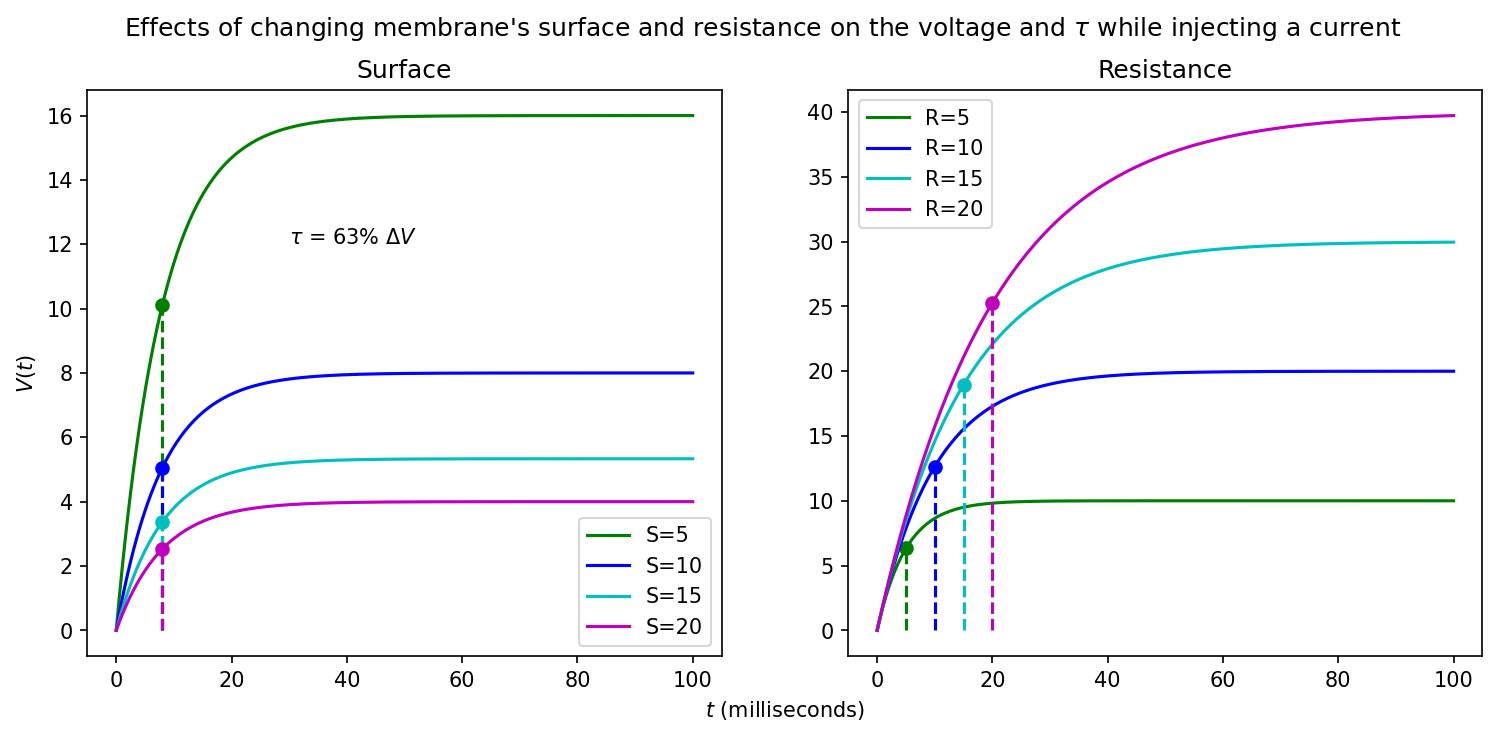

In [18]:
colors = ['g', 'b', 'c', 'm']  # Four colors for our fours values
fig, ax = plt.subplots(1, 2, figsize=(12, 5), dpi=150)
plt.subplot(121)  # Left figure - surface effect on the voltage time course
for s in range(5, 25, 5):  # Draw a curve for the 4 values of surface (5,10,15,20)
    draw_vt(
        t,
        resist=8,  # Let's fix the resistance at 8
        surf=s,
        current=10,
        color=colors[int(
            (s - 1) /
            5)],  # A little division so it can match the colors list index
        name='S=' + str(s))
plt.ylabel('$V(t)$')
plt.text(30, 12, r'$\tau$ = 63% $\Delta V$')
plt.title('Surface')
plt.legend()
plt.subplot(122)  # Right figure - resistance effect on the voltage time course
for s in range(5, 25, 5):  # Same loop as before for the values of resistance
    draw_vt(
        t,
        resist=s,
        surf=5,  # Let's fix the resistance at 5
        current=10,
        color=colors[int((s - 1) / 5)],
        name='R=' + str(s))
plt.xlabel('$t$ (milliseconds)', position=(-0.1, 0))
plt.title('Resistance')
plt.legend()
plt.suptitle(
    r"Effects of changing membrane's surface and resistance on the voltage and $\tau$ while injecting a current"
)

> We can see that increasing the surface does not affect the time constant, it only diminishes the change in membrane potential induced by the applied current. On the other hand, increasing the resistance of the membrane will augment the time constant and it will be accompanied by an increase in the absolute change in potential. The more resistant the membrane is, the longer it will take to get it to its maximal potential (the higher the tau).

<hr class='sep'>

# Spatial Properties

- The membrane potential at a specific distance x from the injection point is given by : 
$$\boxed{\Delta V(x) = \Delta V_{max}(e^{\frac{-x}{\lambda}})}$$
<br>
- The further we are from the injection point the smaller the change in potential is, and for each type of neuron it depends on the length constant $\lambda$ : 
$$\boxed{\lambda = \sqrt{\frac{aR_m}{2R_i}}}$$
>$a$ is the radius of the cell
<br>
$R_m$ is the specific membrane resistance
<br>
<br>
$R_i$ is the axial membrane resistance

- Let's see how the radius of the influences the length constant and thus the change in potential over distance

> Like we did with the time constant, we can use an anonymous function to calculate the length constant

In [19]:
length_const = lambda a, Ri, Rm: np.sqrt((a * Rm) / (2 * Ri))

> the voltage at a given distance or length will be  : 

In [20]:
def potential_x(length, radius, init_potential=1, axial_r=2, membrane_r=2):
    """This function plots the distance course for the change in membrane voltage.
    Axial and membrane resistances are by default 2, Delta V max is by default equal to 1
    """
    return init_potential * np.exp(
        -length / length_const(radius, axial_r, membrane_r))

> Likewise, lets write a function that draws the distance course for our voltage : 

In [21]:
def draw_vx(length, a, color, name, Ri=2, Rm=2):
    """This function plots the distance course for the membrane potential after injecting a current Io.
    it also draws a dashed line and a dot to show the length constant lambda
    for each curve which is 37% of the decrease in potential.
    """

    lambd = length_const(a, Ri, Rm)
    V_lambd = potential_x(lambd, radius=a)
    plt.plot(x, potential_x(length=x, radius=a), color, label=name)  # Curve
    plt.plot(lambd, V_lambd, 'o' + color)  #lambda dot
    plt.plot([lambd, lambd], [0, V_lambd], '--' + color)  # Dashed line

> Let's visualize the process for 4 cells with different radii (2, 8, 16, 32) : 

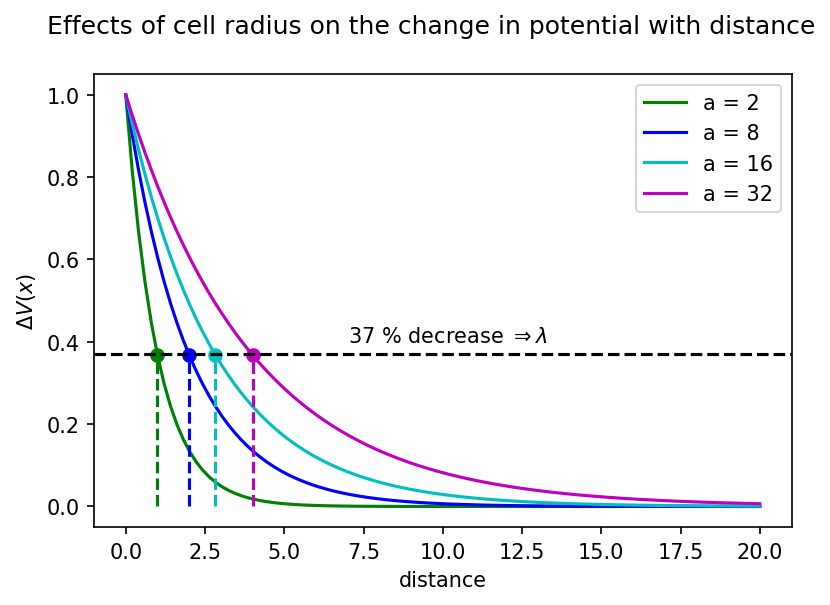

In [23]:
x = np.linspace(0, 20, 100)  # A vector of distances
fig, ax = plt.subplots(dpi=150)
for rad, col in zip(
    [2, 8, 16, 32],
        colors):  # A loop to draw 4 curves with 4 different radii and 4 colors
    draw_vx(length=x, a=rad, color=col, name='a = ' + str(rad))

plt.axhline(y=0.37, color='k', linestyle='--')  # A horziontal line
plt.text(7, 0.4, '37 % decrease $\Rightarrow \lambda$')
plt.xlabel('distance')
plt.ylabel('$\Delta V(x)$')
plt.suptitle('Effects of cell radius on the change in potential with distance')
plt.legend()

> We can see that the bigger the cell (the bigger radius) , the higher the length constant is , which means the more distance the electrotonic potential will cover. 

<hr class='final_sep'>